In [14]:
import argparse
import warnings
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split

import dataset as dataset
import utils as utils
from unet_train import UNetTrain
from unet_custom import UNetSync as UNet

warnings.filterwarnings("ignore")


def get_command_line_args():
    parser = argparse.ArgumentParser(description='Get info about the task',
                                     formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--model_category', '-m', default='Train',
                        help="Specify the model category like train / test")
    parser.add_argument('--directory', '-dir', metavar='INPUT',
                        help='Directory name of images', required=False)
    # parser.add_argument('--image_format', '-imf', metavar='INPUT',
    # help='Image formatting type', required=True, default="jpg")
    parser.add_argument('--learning_rate', '-lr', type=float,
                        help="Learning rate of the model",
                        default=0.001)
    parser.add_argument('--batch_size', '-b', type=int,
                        help="Batch size of the model",
                        default=1)
    parser.add_argument('--no_epochs', '-noe', type=int,
                        help="No of epochs for the model",
                        default=1)
    parser.add_argument('--val_size', '-vs', type=int,
                        help="Validation Size",
                        default=0.2)

    return parser.parse_args()


# # Main function code start
# args = get_command_line_args()
# no_of_epochs = args.no_epochs
# validation_percentage = args.val_size
#
# image = utils.read_image("../../resources/Task1/Train/images/IDRiD_02.tif")
# print(image.shape)
# path=os.path.join()
# images = utils.read_images_from_folder(args.model_category, args.directory, args.image_format)
# print(len(images))
#
# image = pre.scaleradius(image, 300)
# image = pre.normalization(image)
# print(image.shape)
# image = pre.enhance(image)
# utils.display_image(image)
#
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#
# torch.manual_seed(42)
# print(utils.get_train_dir())
# Train dataset import
dataset = dataset.IDRiDDataset(utils.get_train_dir())
print(len(dataset))
x, y = dataset[0]
print(np.array(x).shape, np.array(y).shape)

# Train and validation split
train_size = int((1 - 0.2) * len(dataset))
validation_size = len(dataset) - train_size
train_dataset, validation_dataset = random_split(dataset, [train_size, validation_size])
print('Train dataset', len(train_dataset))
print('Validation dataset', len(validation_dataset))

train_dataloader = DataLoader(train_dataset, batch_size=1,
                              shuffle=True)
for i, batch in enumerate(train_dataloader):
    # x, y = batch
    print(i, len(batch))

validation_dataloader = DataLoader(validation_dataset, batch_size=1,
                                   shuffle=False)

unet_model = UNet(3,5).to(device)
train = UNetTrain(len(train_dataset), train_dataloader, len(validation_dataset), validation_dataloader,epochs=10)
train.train_net(net=unet_model, device=device, save_cp=True)


# losses = []
# val_losses = []
#
# for epoch in range(n_epochs):
#     for x_batch, y_batch in train_loader:
#         x_batch = x_batch.to(device)
#         y_batch = y_batch.to(device)
#
#         loss = train_step(x_batch, y_batch)
#         losses.append(loss)
#
#     with torch.no_grad():
#         for x_val, y_val in val_loader:
#             x_val = x_val.to(device)
#             y_val = y_val.to(device)
#
#             model.eval()
#
#             yhat = model(x_val)
#             val_loss = loss_fn(y_val, yhat)
#             val_losses.append(val_loss.item())

144
(256, 256, 3) (256, 256)
Train dataset 115
Validation dataset 29
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 2
83 2
84 2
85 2
86 2
87 2
88 2
89 2
90 2
91 2
92 2
93 2
94 2
95 2
96 2
97 2
98 2
99 2
100 2
101 2
102 2
103 2
104 2
105 2
106 2
107 2
108 2
109 2
110 2
111 2
112 2
113 2
114 2

            Start train:
                Epochs: 10
                Learning rate: 0.001
                Training size: 115
                Validation size: 29
                Checkpoints: True
                CUDA: cuda
            
Starting epoch 1/10.


KeyboardInterrupt: 

In [38]:
import argparse
import warnings
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split

import dataset as dataset
import utils as utils
from unet_train import UNetTrain
from unet_custom import UNetSync as UNet

warnings.filterwarnings("ignore")

def load_checkpoint(checkpoint_path, model):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state)
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
unet_model = UNet(3,5).to(device)
model = load_checkpoint('checkpoints/CP10.pth',unet_model)

144
(256, 256, 3) (256, 256)
Train dataset 115
Validation dataset 29
torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65347,    42,   143,     4], dtype=int64), array([0, 1, 2, 3, 4]))


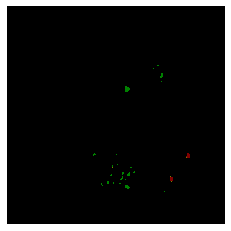

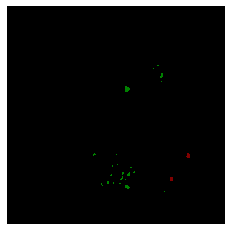

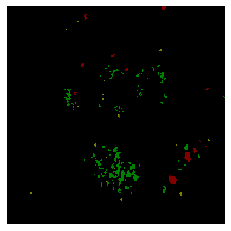

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


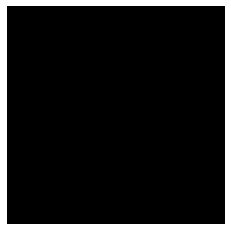

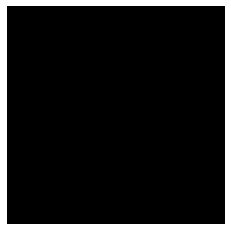

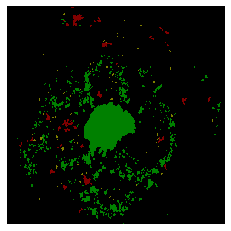

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


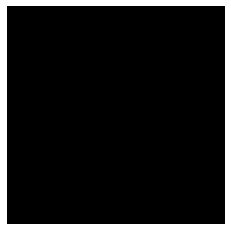

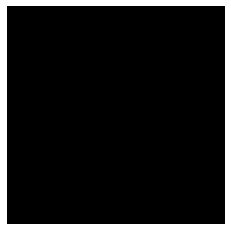

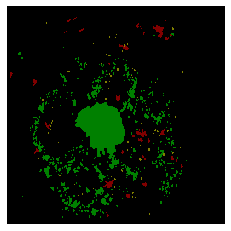

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


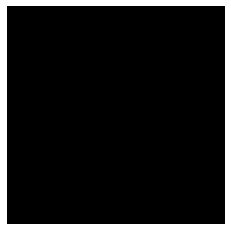

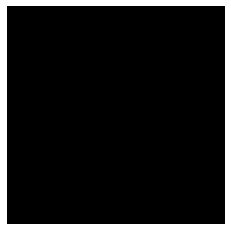

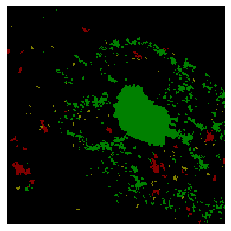

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65327,     0,   205,     4], dtype=int64), array([0, 1, 2, 3, 4]))


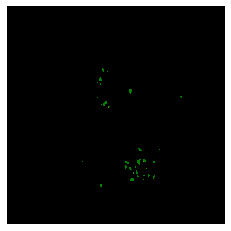

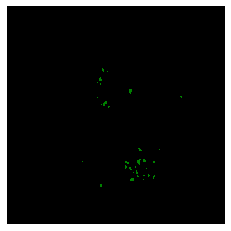

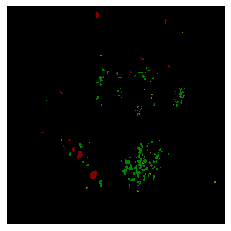

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65533,     0,     3,     0], dtype=int64), array([0, 1, 2, 3, 4]))


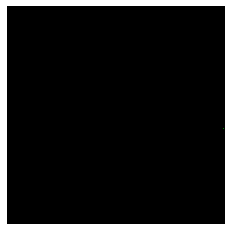

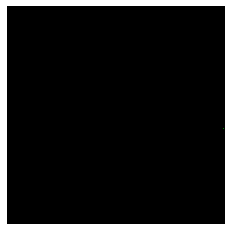

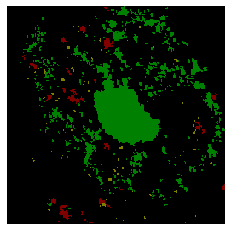

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


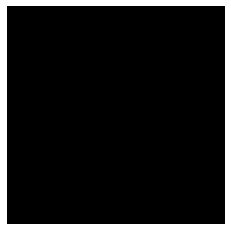

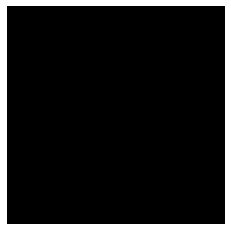

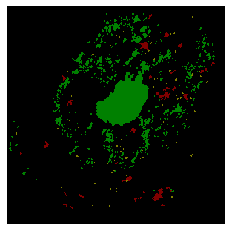

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65421,    10,   104,     1], dtype=int64), array([0, 1, 2, 3, 4]))


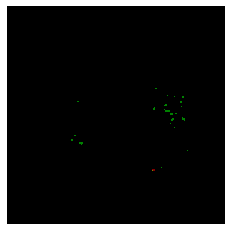

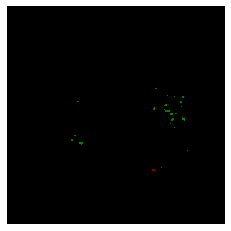

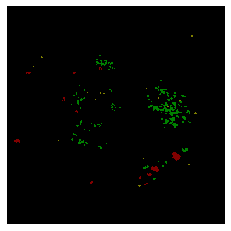

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65533,     0,     2,     1], dtype=int64), array([0, 1, 2, 3, 4]))


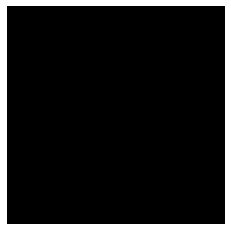

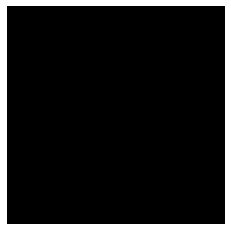

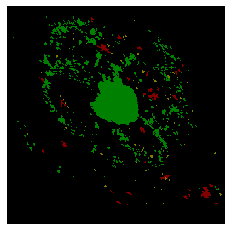

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65363,     1,   166,     6], dtype=int64), array([0, 1, 2, 3, 4]))


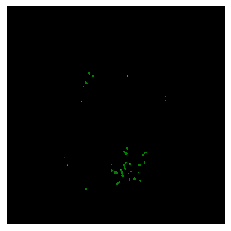

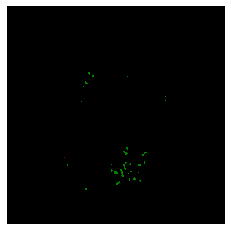

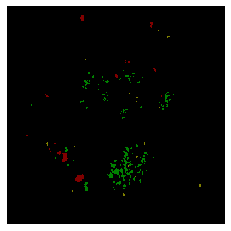

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


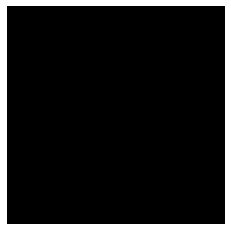

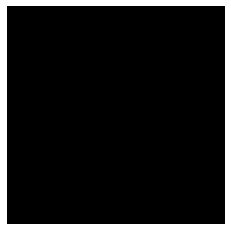

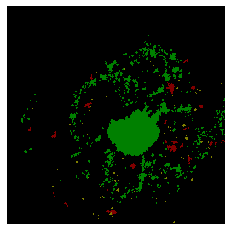

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65534,     0,     2,     0], dtype=int64), array([0, 1, 2, 3, 4]))


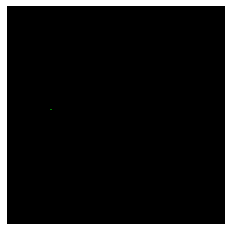

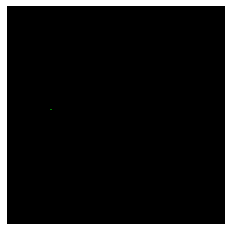

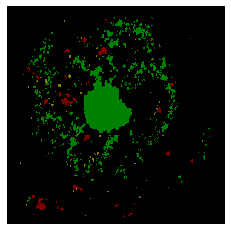

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


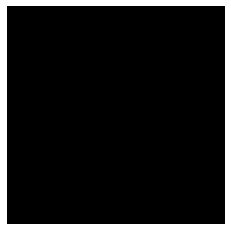

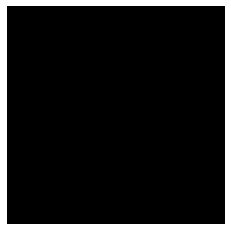

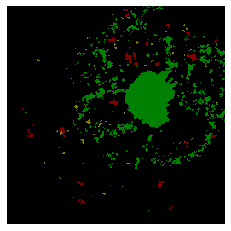

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65534,     0,     2,     0], dtype=int64), array([0, 1, 2, 3, 4]))


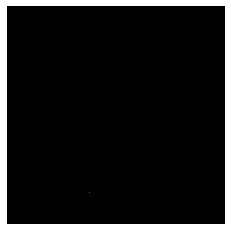

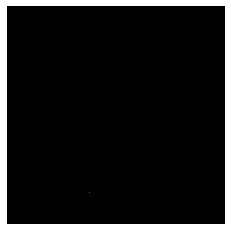

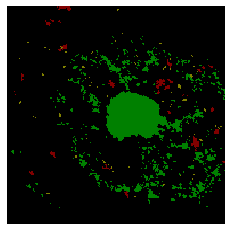

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


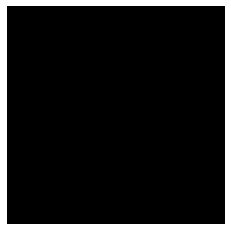

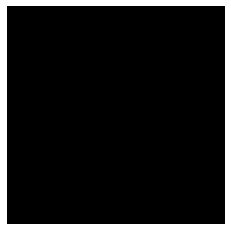

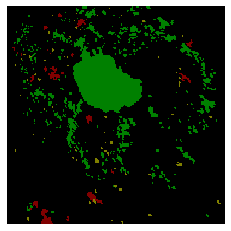

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65534,     0,     2,     0], dtype=int64), array([0, 1, 2, 3, 4]))


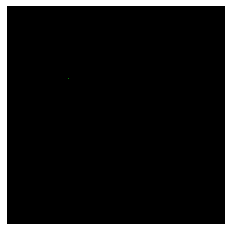

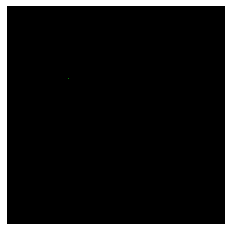

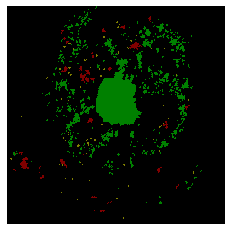

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65534,     0,     2,     0], dtype=int64), array([0, 1, 2, 3, 4]))


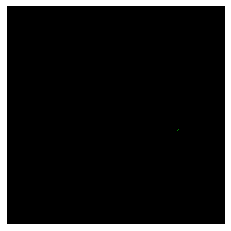

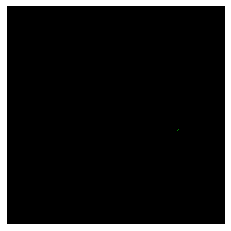

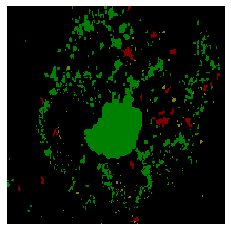

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65404,     0,   130,     2], dtype=int64), array([0, 1, 2, 3, 4]))


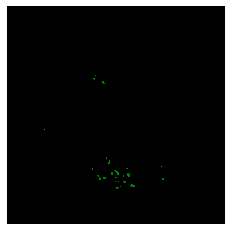

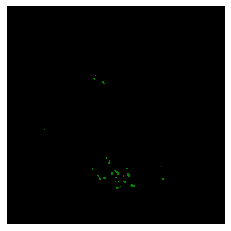

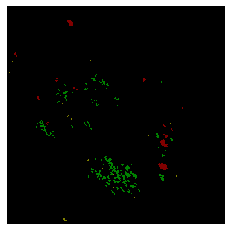

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65535,     0,     1,     0], dtype=int64), array([0, 1, 2, 3, 4]))


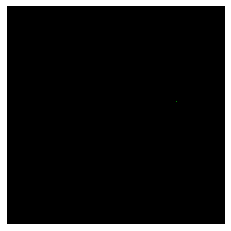

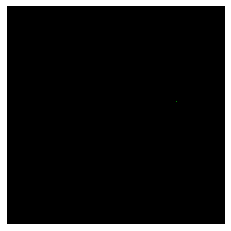

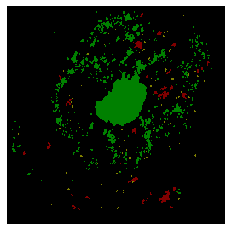

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65535,     0,     1,     0], dtype=int64), array([0, 1, 2, 3, 4]))


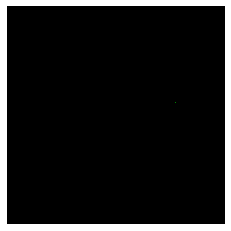

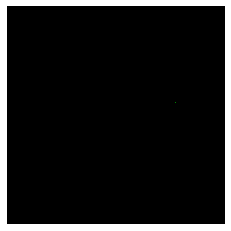

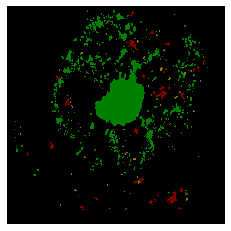

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


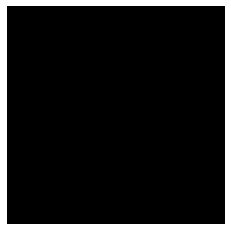

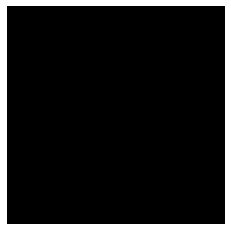

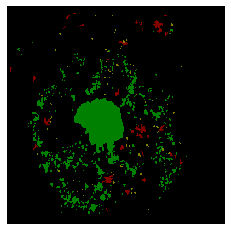

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


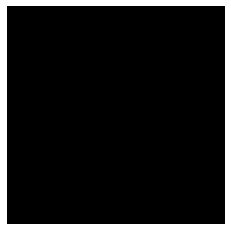

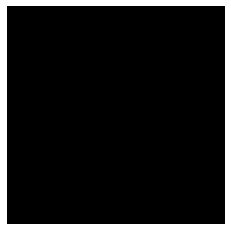

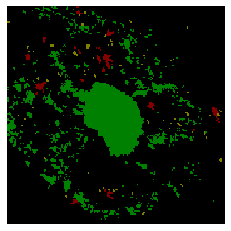

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65404,    22,   108,     2], dtype=int64), array([0, 1, 2, 3, 4]))


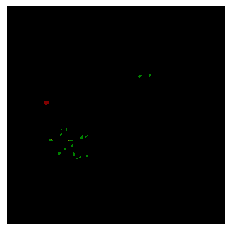

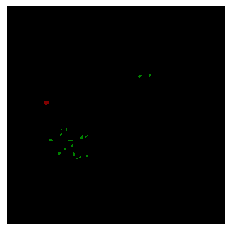

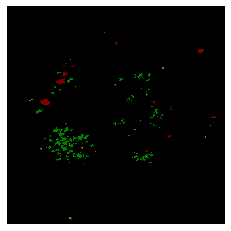

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


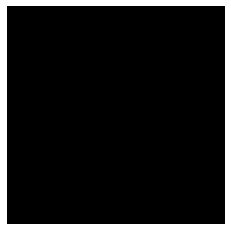

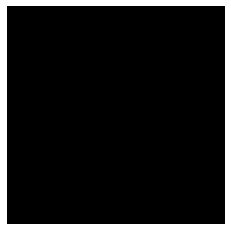

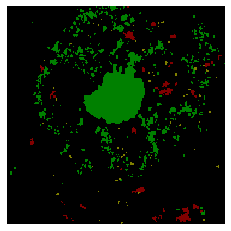

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65520,     0,    16,     0], dtype=int64), array([0, 1, 2, 3, 4]))


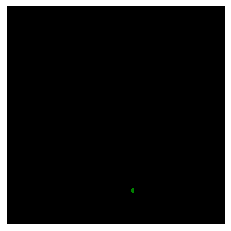

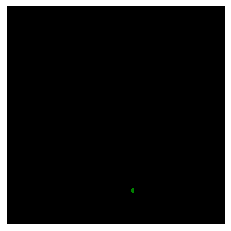

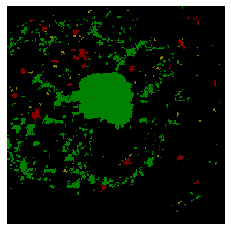

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


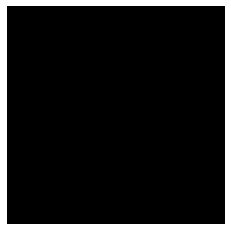

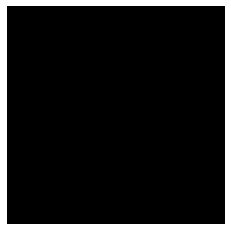

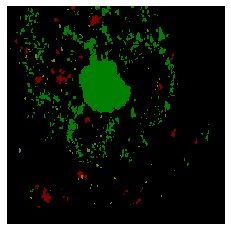

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


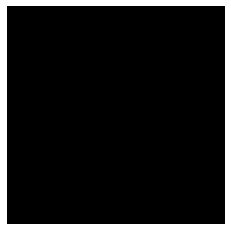

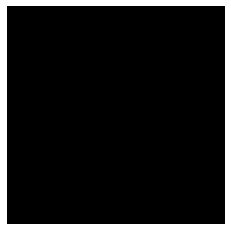

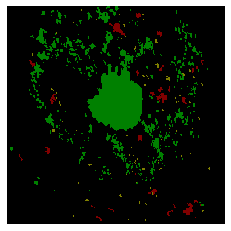

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65535,     0,     1,     0], dtype=int64), array([0, 1, 2, 3, 4]))


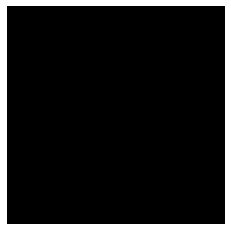

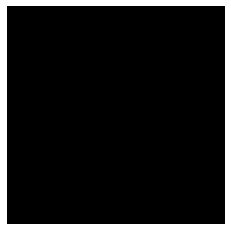

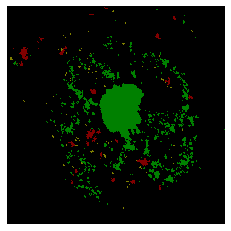

torch.Size([1, 5, 256, 256])
(256, 256)
False
(array([65536,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4]))


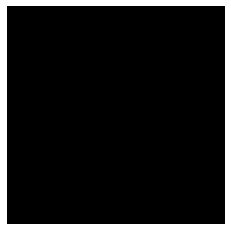

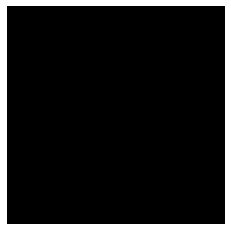

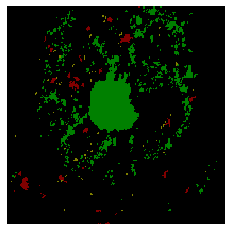

In [49]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import dataset as dataset
# Define the helper function
def decode_segmap(image, nc=5):
   
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128)])
 
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
   
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
     
    return np.stack([r, g, b], axis=2)


dataset = dataset.IDRiDDataset(utils.get_train_dir())
print(len(dataset))
x, y = dataset[0]
print(np.array(x).shape, np.array(y).shape)

# Train and validation split
train_size = int((1 - 0.2) * len(dataset))
validation_size = len(dataset) - train_size
train_dataset, validation_dataset = random_split(dataset, [train_size, validation_size])
print('Train dataset', len(train_dataset))
print('Validation dataset', len(validation_dataset))

    
validation_dataloader = DataLoader(validation_dataset, batch_size=1,
                                   shuffle=False)

test_loss = 0
correct = 0
masks_pic = []
with torch.no_grad():
    for k, val_batch in enumerate(validation_dataloader):
        validation_input, validation_label = val_batch
        validation_images = validation_input.type(torch.FloatTensor).to(device).permute(0, 3, 1, 2)
        validation_targets = validation_label.type(torch.LongTensor).to(device)
        output = model(validation_images)
        target = F.softmax(output, dim=1) > 0.5
        print(target.size())
        # target has now a 1 in channel c if the pixel location belongs
        # to that class (like your target images)

        om = torch.argmax(target.double(), dim=1).cpu().numpy().squeeze()
        print(om.shape)
        om2 = torch.argmax(output.squeeze(), dim=0).detach().cpu().numpy()
        print(om.astype(np.uint8) is om2.astype(np.uint8))
        print(np.histogram(om,bins=range(5)))
        rgb3 = decode_segmap(om)
        rgb = decode_segmap(om2)
        rgb1 = decode_segmap(validation_targets.squeeze().cpu().numpy())
        plt.imshow(rgb3); plt.axis('off'); plt.show()
        plt.imshow(rgb); plt.axis('off'); plt.show()
        plt.imshow(rgb1); plt.axis('off'); plt.show()
        masks_pic.append(om)
#         test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
#         pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
# #         correct += pred.eq(target.view_as(pred)).sum().item()
    
# test_loss /= len(testset_loader.dataset)
# print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#         test_loss, correct, len(testset_loader.dataset),
#         100. * correct / len(testset_loader.dataset)))
